In [72]:
library(ggplot2)
library(ggmap)
library(ggalt)
library(dplyr)

In [5]:
options(warn=-1)

In [107]:
df <- read.csv("Melbourne_housing_FULL-26-09-2017.csv")

In [110]:
as.numeric(df[df$Suburb == "Balwyn",]$Distance)

[1] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
 [19] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
 [37] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
 [55] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
 [73] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
 [91] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
[109] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
[127] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
[145] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
[163] 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210 210
[181] 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194
[199] 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194
[217] 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194 194
[235] 194 194 194 194 194 194

In [5]:
dim(df)

[1] 23547    21

In [6]:
str(df)

'data.frame':	23547 obs. of  21 variables:
 $ Suburb       : Factor w/ 336 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : Factor w/ 23108 levels "1 Abercrombie St",..: 20002 22084 10427 6622 17071 15745 18380 5650 18185 23076 ...
 $ Rooms        : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 3 1 1 1 1 1 1 ...
 $ Price        : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method       : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 8 6 1 8 5 3 3 ...
 $ SellerG      : Factor w/ 330 levels "@Realty","Abercromby's",..: 147 30 30 269 30 30 208 208 30 65 ...
 $ Date         : Factor w/ 58 levels "1/07/2017","10/09/2016",..: 44 46 48 48 49 49 50 52 52 52 ...
 $ Distance     : Factor w/ 212 levels "#N/A","0","0.7",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ Postcode     : Factor w/ 207 levels "#N/A","3000",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Bedroom2     : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom     : 

In [7]:
df$Date = as.Date(df$Date, format = "%d/%m/%Y")

In [8]:
head(df)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,2016-09-03,2.5,3067,⋯,1,1,126,NA,NA,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,⋯,1,1,202,NA,NA,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,⋯,1,0,156,79,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,2016-02-04,2.5,3067,⋯,2,1,0,NA,NA,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,⋯,2,0,134,150,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,⋯,2,1,94,NA,NA,Yarra,-37.7969,144.9969,Northern Metropolitan,4019


#### Number of Missing values by columns

In [9]:
colSums(is.na(df))

Suburb       Address         Rooms          Type         Price 
            0             0             0             0          5151 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         4481          4484          4626          6137         13529 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        12007             0          4304          4304             0 
Propertycount 
            0

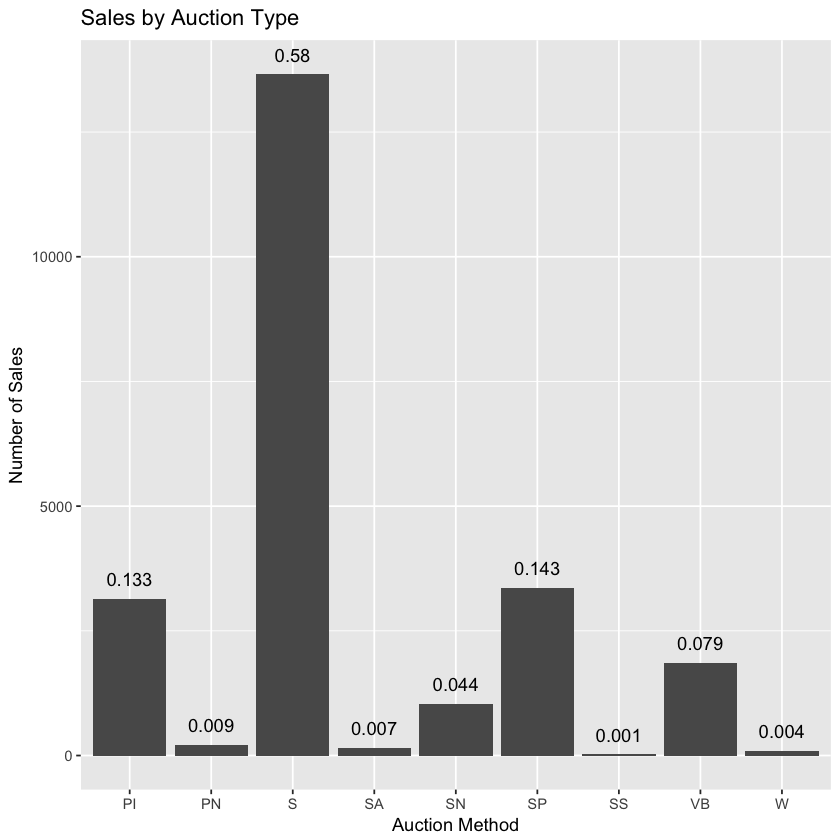

In [81]:
g <- ggplot(df, aes(x = Method,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1) + ggtitle('Sales by Auction Type') +xlab('Auction Method') + ylab('Number of Sales')

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

58% of the houses are sold (S) during the Auction  and another 14.3% prior to the auction(SP). 

13.3% are "Passed in"(PI) meaning not sold.

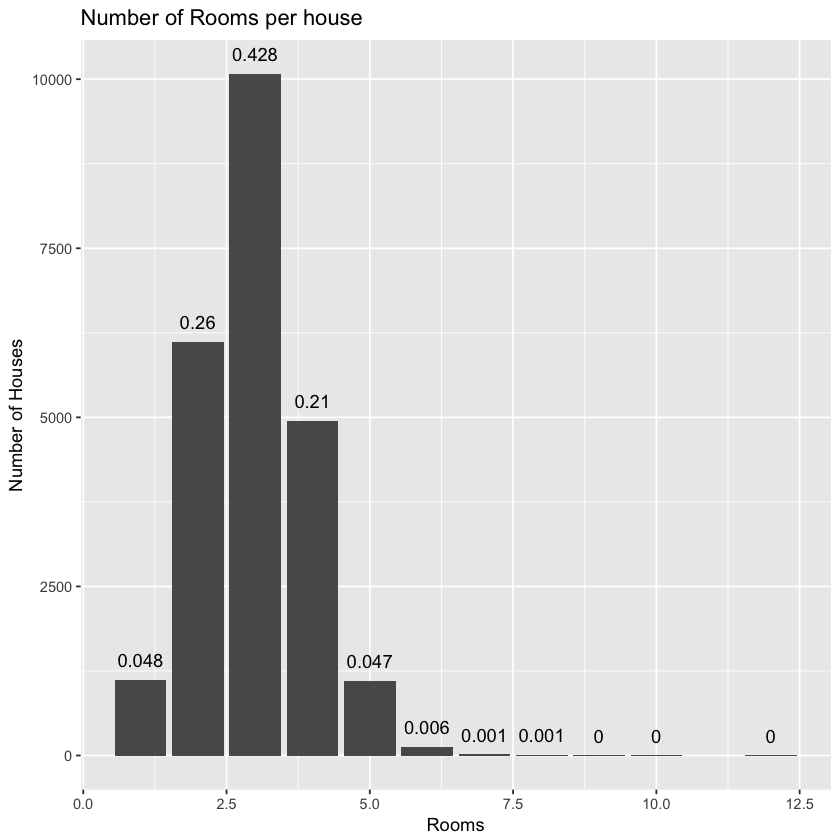

In [82]:
g <- ggplot(df, aes(x = Rooms,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)  + ggtitle('Number of Rooms per house')+ ylab('Number of Houses')

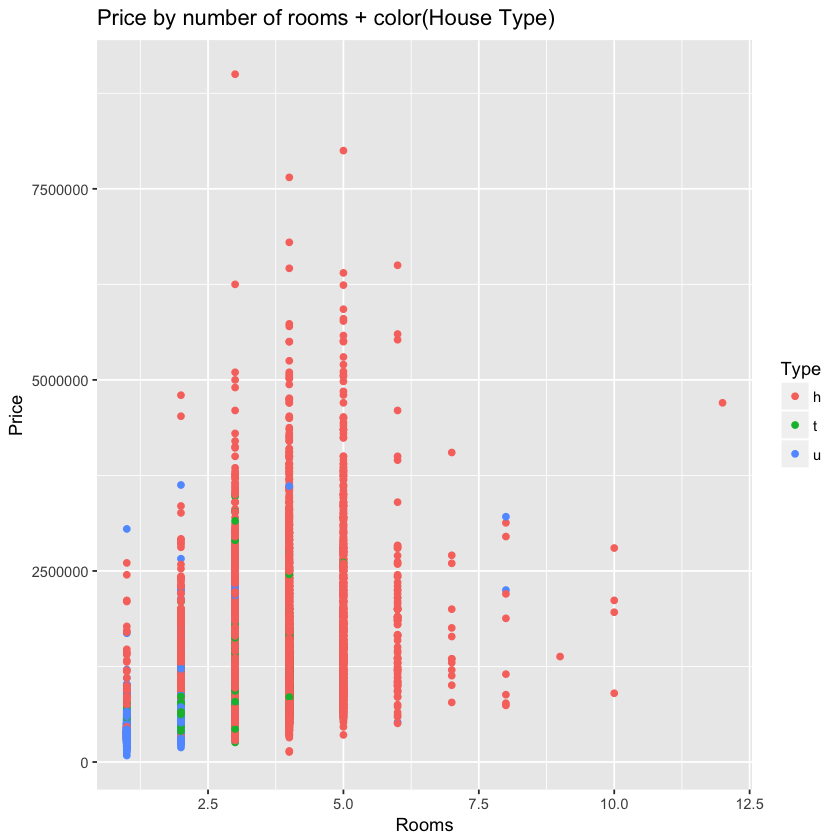

In [87]:
ggplot(df, aes(x = Rooms,y = Price, color=Type)) + geom_point() + ggtitle('Price by number of rooms + color(House Type)') +xlab('Rooms') + ylab('Price')

In [20]:
melbourne <- geocode('Melbourne',messaging = FALSE)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Melbourne


In [14]:
melbourne_ggl_sat_map <- qmap('melbourne', zoom = 10, source = 'google', maptype= "roadmap")

Source : https://maps.googleapis.com/maps/api/staticmap?center=melbourne&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=melbourne


In [110]:
agg_df <- aggregate(Price ~ Suburb, df, median)

In [111]:
places = df[,c('Longtitude','Lattitude','Suburb')]

In [112]:
places <- places[!duplicated(places$Suburb), ]

In [113]:
places <- merge(x = places, y = agg_df, by = "Suburb", all.x = TRUE)

In [114]:
places1 <- na.omit(places)

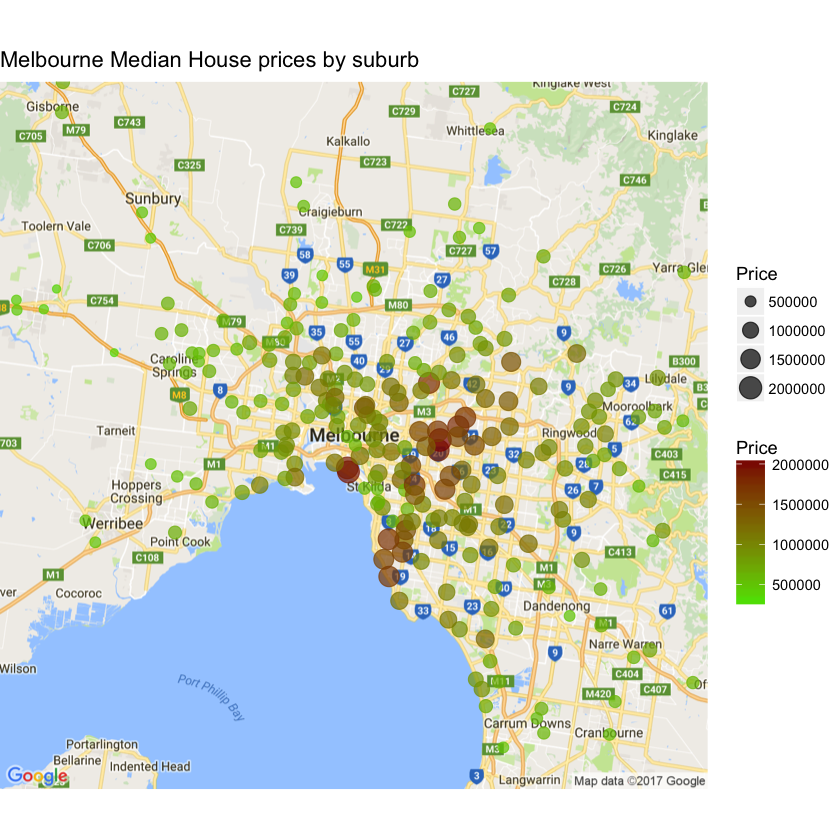

In [115]:
melbourne_ggl_sat_map + geom_point(aes(x=Longtitude,y=Lattitude, size=Price,color=Price),
                                   data = places1,
                                   alpha = 0.7
                                   ) + scale_colour_gradient2(low = "lightgreen", mid = "green", high = "darkred") + ggtitle("Melbourne Median House prices by suburb") 

We can see the expensive houses sold near Albert Park, Kew and Brithton areas

In [94]:
agg_df <- aggregate(Price ~ Suburb, df, mean)

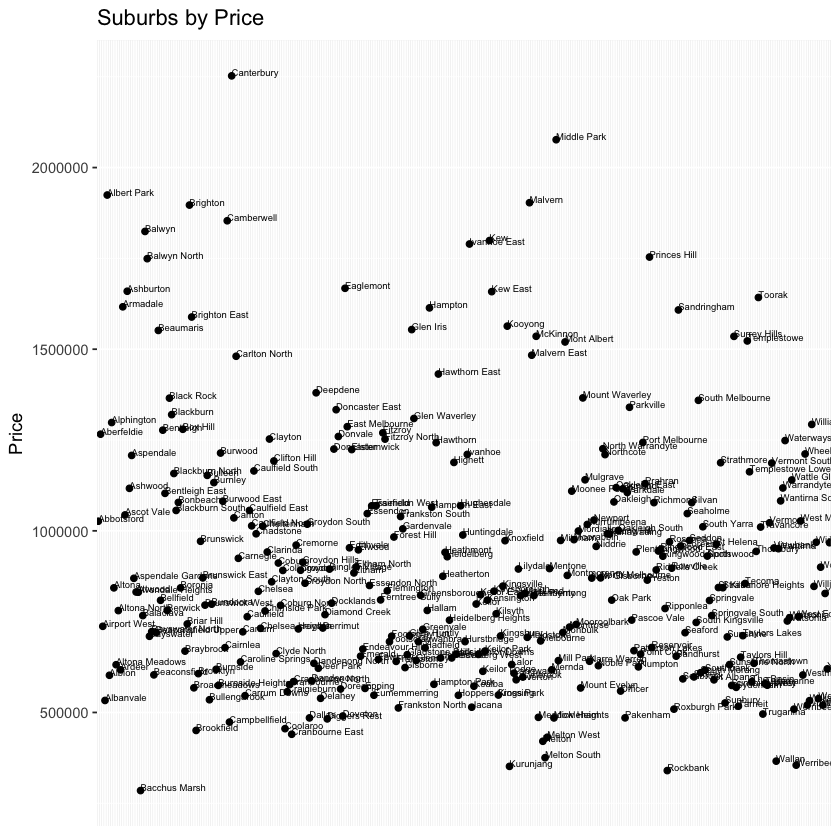

In [95]:
ggplot(agg_df, aes(x=Suburb,y=Price)) +
    geom_point() + 
    geom_text(aes(label=Suburb),hjust=0, vjust=0, size=2) +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
    
) + ggtitle('Suburbs by Price')

In [104]:
as.numeric('2.5')

[1] 2.5

In [111]:
df$Distance <- as.numeric(as.character(df$Distance))

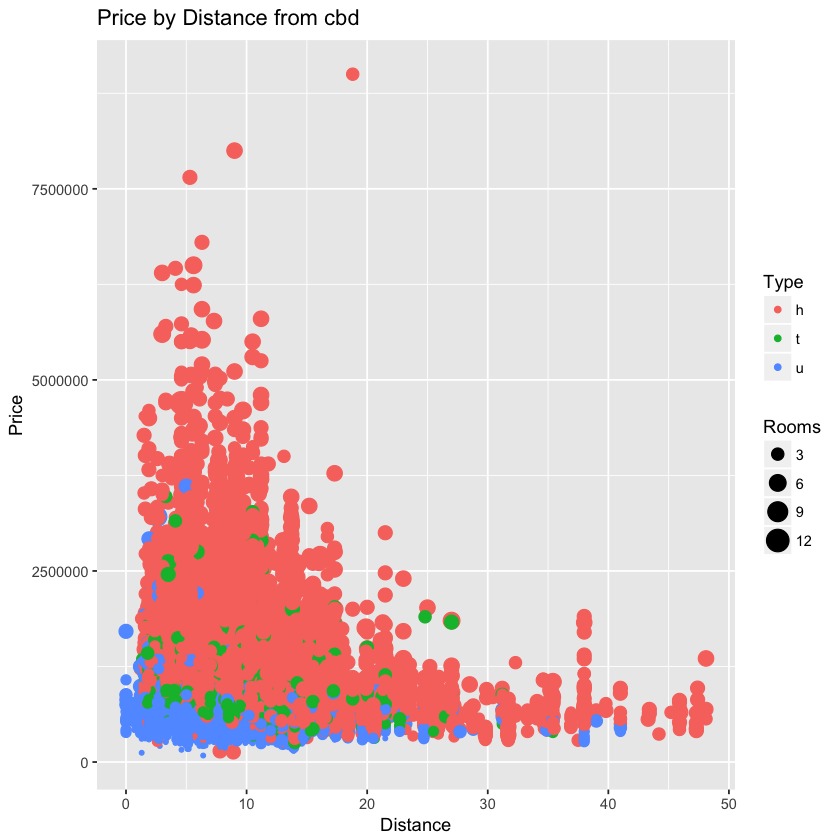

In [116]:
p <- ggplot(df, aes(x = Distance, y = Price,color=Type,size=Rooms))
p + geom_point() +
     ggtitle('Price by Distance from cbd') +
     xlab('Distance') +
     ylab('Price')

## 5 of the most expensive suburbs by mean price.

In [120]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(mean_stat = mean(Price)) %>%
  arrange(desc(mean_stat)) %>%
  top_n(n = 5, wt = mean_stat)  

Suburb,mean_stat
Kooyong,3080000
Canterbury,2438135
Middle Park,2295167
Beaumaris,2130400
Malvern,2059875


# 5 of the most expensive suburbs by median price.


In [121]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(median_stat = median(Price)) %>%
  arrange(desc(median_stat)) %>%
  top_n(n = 5, wt = median_stat) 

Suburb,median_stat
Kooyong,3080000
Canterbury,2362500
Carlton North,2000000
Malvern,1995000
Middle Park,1965000


In [20]:
data.frame(table(df$Suburb))  %>%
    arrange(desc(Freq)) %>%
    top_n(n = 20, wt = Freq) 

Var1,Freq
Reservoir,629
Bentleigh East,429
Richmond,416
Glen Iris,378
Kew,357
Preston,357
Brighton,348
South Yarra,331
Brunswick,330
Hawthorn,318


In [46]:
sale_counts_suburb <- data.frame(table(data.frame(table(df$Suburb))$Freq))

In [65]:
sale_counts_suburb$Var1 <- as.numeric(sale_counts_suburb$Var1)

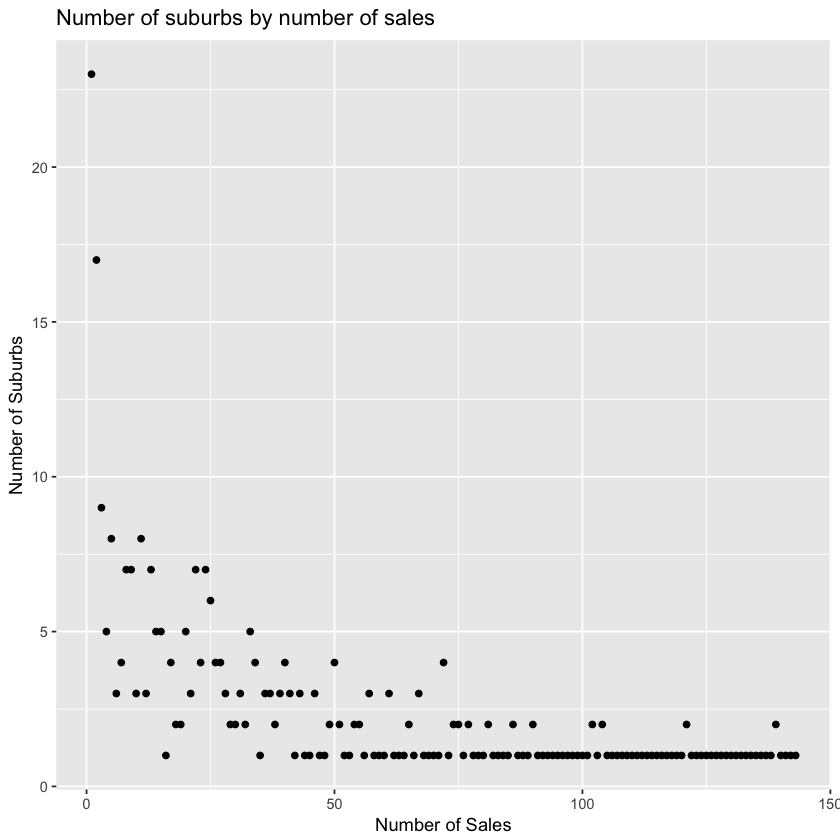

In [92]:
p <- ggplot(sale_counts_suburb, aes(x = Var1, y = Freq))
p + geom_point() +
     ggtitle('Number of suburbs by number of sales') +
     xlab('Number of Sales') +
     ylab('Number of Suburbs')